In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5395040606182907734]

In [4]:
df = pd.read_csv('data/medibloc(2018~2021).csv', encoding='cp949')
df.tail()

,날짜,시가,고가,저가,종가,거래량,시가총액
1090,30-Mar-21,102.73,119.43,102.72,111.63,"\229,362,666,554","\305,655,135,725"
1091,31-Mar-21,112.61,140.07,109.94,130.17,"\503,803,529,611","\356,424,611,490"
1092,01-Apr-21,130.17,277.06,127.18,273.11,"\2,256,586,556,340","\747,797,814,365"
1093,02-Apr-21,267.53,398.55,267.53,298.93,"\1,629,150,393,198","\818,506,251,680"
1094,03-Apr-21,299.90,327.75,272.89,286.96,"\586,518,672,303","\785,724,654,933"


In [5]:
# 당일 중간가격 구하기
high_prices = df['고가'].values
low_prices = df['저가'].values
mid_prices = (high_prices+low_prices)/2 

In [6]:
len(mid_prices)

1095

In [7]:
# 최근 7일을 기준으로 다음날 가격을 예측
seq_len = 7
squence_length = seq_len + 1
result = []
print(len(mid_prices) - squence_length)
for i in range(len(mid_prices) - squence_length):
    print(i)
    print(mid_prices[i: i + squence_length])
    result.append(mid_prices[i: i + squence_length])

1087
0
[16.345 15.855 16.46  17.025 17.45  17.195 17.68  18.39 ]
1
[15.855 16.46  17.025 17.45  17.195 17.68  18.39  20.24 ]
2
[16.46  17.025 17.45  17.195 17.68  18.39  20.24  21.9  ]
3
[17.025 17.45  17.195 17.68  18.39  20.24  21.9   22.775]
4
[17.45  17.195 17.68  18.39  20.24  21.9   22.775 22.095]
5
[17.195 17.68  18.39  20.24  21.9   22.775 22.095 21.645]
6
[17.68  18.39  20.24  21.9   22.775 22.095 21.645 22.235]
7
[18.39  20.24  21.9   22.775 22.095 21.645 22.235 22.895]
8
[20.24  21.9   22.775 22.095 21.645 22.235 22.895 26.07 ]
9
[21.9   22.775 22.095 21.645 22.235 22.895 26.07  34.09 ]
10
[22.775 22.095 21.645 22.235 22.895 26.07  34.09  43.07 ]
11
[22.095 21.645 22.235 22.895 26.07  34.09  43.07  39.235]
12
[21.645 22.235 22.895 26.07  34.09  43.07  39.235 39.57 ]
13
[22.235 22.895 26.07  34.09  43.07  39.235 39.57  37.385]
14
[22.895 26.07  34.09  43.07  39.235 39.57  37.385 36.035]
15
[26.07  34.09  43.07  39.235 39.57  37.385 36.035 39.4  ]
16
[34.09  43.07  39.235 39.5

722
[3.1   2.78  2.755 2.74  2.765 2.72  2.765 3.055]
723
[2.78  2.755 2.74  2.765 2.72  2.765 3.055 2.91 ]
724
[2.755 2.74  2.765 2.72  2.765 3.055 2.91  2.895]
725
[2.74  2.765 2.72  2.765 3.055 2.91  2.895 2.95 ]
726
[2.765 2.72  2.765 3.055 2.91  2.895 2.95  3.01 ]
727
[2.72  2.765 3.055 2.91  2.895 2.95  3.01  3.01 ]
728
[2.765 3.055 2.91  2.895 2.95  3.01  3.01  3.035]
729
[3.055 2.91  2.895 2.95  3.01  3.01  3.035 2.92 ]
730
[2.91  2.895 2.95  3.01  3.01  3.035 2.92  2.835]
731
[2.895 2.95  3.01  3.01  3.035 2.92  2.835 2.85 ]
732
[2.95  3.01  3.01  3.035 2.92  2.835 2.85  2.81 ]
733
[3.01  3.01  3.035 2.92  2.835 2.85  2.81  2.855]
734
[3.01  3.035 2.92  2.835 2.85  2.81  2.855 2.905]
735
[3.035 2.92  2.835 2.85  2.81  2.855 2.905 2.89 ]
736
[2.92  2.835 2.85  2.81  2.855 2.905 2.89  2.935]
737
[2.835 2.85  2.81  2.855 2.905 2.89  2.935 2.97 ]
738
[2.85  2.81  2.855 2.905 2.89  2.935 2.97  2.98 ]
739
[2.81  2.855 2.905 2.89  2.935 2.97  2.98  2.925]
740
[2.855 2.905 2.89  2.935

In [8]:
# 정규화
normalized_data = []
for window in result:
    normalized_window = [((float(p)/float(window[0])) - 1)for p in window]
    normalized_data.append(normalized_window)
    
result = np.array(normalized_data)

array([[ 0.        , -0.00185874, -0.00557621, ...,  0.05111524,
         0.01486989,  0.00836431],
       [ 0.        ,  0.02248677,  0.37566138, ...,  0.21428571,
         0.26058201,  0.25793651],
       [ 0.        , -0.0416198 ,  0.01799775, ..., -0.05849269,
        -0.14060742, -0.15298088],
       ...,
       [ 0.        , -0.05025077, -0.05643473, ..., -0.02361591,
        -0.0408044 ,  0.00248332],
       [ 0.        , -0.00651115, -0.00410151, ...,  0.00994617,
         0.05552422,  0.13893873],
       [ 0.        ,  0.00242543,  0.03478171, ...,  0.06244194,
         0.14640314,  0.29017442]])

In [10]:
result.shape

(1087, 8)

In [67]:
#data split
row = int(round(result.shape[0]*0.9))
train = result[:row,:]
np.random.shuffle(train)

x_train = train[:,:-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
y_train = train[:,-1]

x_test = result[row:,:-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
y_test = result[row:,-1]
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((978, 7, 1), (109, 7, 1), (978,), (109,))

In [40]:
y_test

array([-6.36889992e-02, -1.42984808e-02, -2.47349823e-02,  8.23421775e-03,
        1.10294118e-02, -2.43682310e-02, -8.14159292e-02, -7.77385159e-02,
       -1.11514053e-01, -1.36775362e-01, -1.13430127e-01, -1.44545455e-01,
       -9.89824237e-02,  5.78034682e-03, -1.36015326e-01, -1.16326531e-01,
        3.67261280e-02, -2.45649949e-02,  1.41339001e-01, -1.39630390e-01,
       -2.09770115e-01,  2.68292683e-01,  2.09006928e-01, -5.46558704e-02,
       -3.67261280e-02, -6.33147114e-02,  1.87350835e-01,  1.23636364e-01,
       -1.92307692e-01, -1.39446036e-01,  8.35117773e-02,  3.26797386e-02,
       -4.87077535e-02, -3.01507538e-02,  9.06148867e-02,  1.41774892e-01,
        1.67591565e-01, -1.28458498e-02,  2.00421941e-02,  7.41901776e-02,
        7.04663212e-02,  1.38476756e-02, -4.92890995e-02, -4.37262357e-02,
        0.00000000e+00,  1.53050672e-01,  3.01556420e-02, -9.68054211e-04,
       -1.85365854e-02,  2.99102692e-02,  1.31212724e-01,  1.26126126e-01,
        1.43497758e-02,  

In [22]:
# LSTM  모델구현
model = Sequential()
model.add(LSTM(255,return_sequences=True, input_shape=(7,1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 7, 255)            262140    
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                81920     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 344,125
Trainable params: 344,125
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Early Stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10, verbose=1)

In [23]:
history = model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=20, epochs=500, callbacks=es)

Epoch 1/500
49/49 [==============================] - 5s 27ms/step - loss: 0.0165 - mae: 0.0823 - val_loss: 0.1658 - val_mae: 0.2067
Epoch 2/500
49/49 [==============================] - 0s 10ms/step - loss: 0.0096 - mae: 0.0546 - val_loss: 0.1367 - val_mae: 0.1868
Epoch 3/500
49/49 [==============================] - 0s 10ms/step - loss: 0.0092 - mae: 0.0532 - val_loss: 0.1012 - val_mae: 0.1445
Epoch 4/500
49/49 [==============================] - 0s 10ms/step - loss: 0.0048 - mae: 0.0433 - val_loss: 0.0847 - val_mae: 0.1339
Epoch 5/500
49/49 [==============================] - 0s 10ms/step - loss: 0.0049 - mae: 0.0423 - val_loss: 0.0892 - val_mae: 0.1429
Epoch 6/500
49/49 [==============================] - 0s 9ms/step - loss: 0.0039 - mae: 0.0392 - val_loss: 0.0827 - val_mae: 0.1352
Epoch 7/500
49/49 [==============================] - 0s 10ms/step - loss: 0.0045 - mae: 0.0398 - val_loss: 0.0833 - val_mae: 0.1414
Epoch 8/500
49/49 [==============================] - 0s 10ms/step - loss: 0.0

In [15]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 7ms/step - loss: 0.0816 - mae: 0.1371


[0.08162949234247208, 0.13712430000305176]

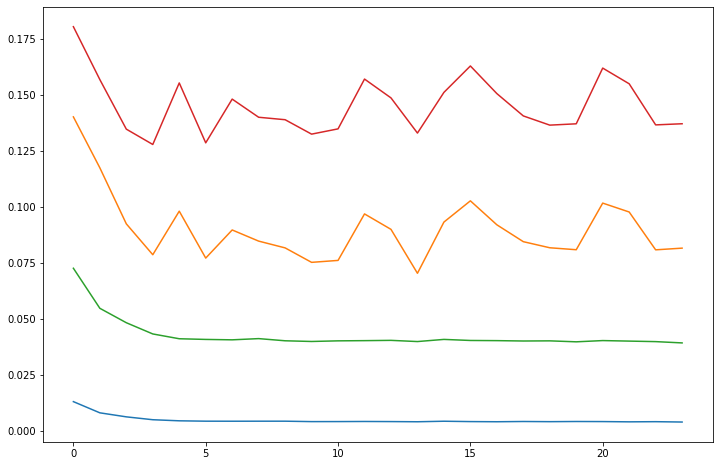

In [16]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.show()

In [30]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white')
ax = fig.add_subplot(1,1,1)
ax.plot(y_test,label='True')
ax.plot(pred, label='prediction')
ax.legend()
plt.show()

ValueError: in user code:

    C:\anconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\anconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\anconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\anconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\anconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\anconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\anconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\anconda\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\anconda\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:219 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 8)


In [18]:
x_test

array([[[ 0.00000000e+00],
        [-7.44416873e-02],
        [-6.36889992e-02],
        [-9.59470637e-02],
        [-1.00082713e-01],
        [-8.35401158e-02],
        [-6.53432589e-02]],

       [[ 0.00000000e+00],
        [ 1.16175156e-02],
        [-2.32350313e-02],
        [-2.77033065e-02],
        [-9.83020554e-03],
        [ 9.83020554e-03],
        [ 1.16175156e-02]],

       [[ 0.00000000e+00],
        [-3.44522968e-02],
        [-3.88692580e-02],
        [-2.12014134e-02],
        [-1.76678445e-03],
        [ 0.00000000e+00],
        [-2.56183746e-02]],

       [[ 0.00000000e+00],
        [-4.57456542e-03],
        [ 1.37236962e-02],
        [ 3.38517841e-02],
        [ 3.56816102e-02],
        [ 9.14913083e-03],
        [ 1.00640439e-02]],

       [[ 0.00000000e+00],
        [ 1.83823529e-02],
        [ 3.86029412e-02],
        [ 4.04411765e-02],
        [ 1.37867647e-02],
        [ 1.47058824e-02],
        [ 1.28676471e-02]],

       [[ 0.00000000e+00],
        [ 1.985559